In [ ]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# X = df.drop('koi_disposition', axis=1).values.reshape(6991, 40)
X = df.drop(['koi_disposition','koi_srad','koi_slogg', 'koi_insol_err2','koi_slogg_err1'
            ,'koi_prad_err2','koi_tce_plnt_num','koi_teq','koi_insol','koi_impact_err2'
            ,'koi_depth','koi_srad_err2','koi_kepmag','koi_period_err1','koi_duration_err1'
            , 'koi_time0bk_err1', 'koi_period_err2','koi_steff', 'koi_prad_err1', 'koi_impact_err1'
            , 'koi_depth_err2', 'koi_slogg_err2', 'koi_depth_err1', 'koi_duration_err2', 'koi_duration'
            , 'koi_steff_err1', 'koi_time0bk_err2', 'koi_period', 'koi_srad_err1','dec'
             ,'koi_fpflag_ec'], axis = 1)
X = X.values.reshape(X.shape[0],X.shape[1])
y = df['koi_disposition']

from sklearn.preprocessing import LabelEncoder
# Label encode data set to 0, 1 or 2
label_encoder = LabelEncoder()
label_encoder.fit(y)

## Convert the target from 3 variables to 2 variables by combining Confirmed and Candidate
# y = label_encoder.transform(y)
# y = np.where(y== 1, 0, y)
print(y)


0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
# X = pd.get_dummies(X) not needed because no catagorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train

6122         CANDIDATE
6370    FALSE POSITIVE
2879    FALSE POSITIVE
107          CONFIRMED
29           CANDIDATE
             ...      
3772    FALSE POSITIVE
5191         CANDIDATE
5226    FALSE POSITIVE
5390    FALSE POSITIVE
860     FALSE POSITIVE
Name: koi_disposition, Length: 5243, dtype: object

In [5]:
# Set features. This will also be used as your x values.
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)  # 

#Transform the training and testing data using the X_scaler and y_scaler models
# Standard scaler if aren't sure if there are outliers, if outliers use standard scaler.
# use min max if no outliers

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/TestScore:  1.000/ 0.757
k: 3, Train/TestScore:  0.887/ 0.784
k: 5, Train/TestScore:  0.860/ 0.789
k: 7, Train/TestScore:  0.850/ 0.787
k: 9, Train/TestScore:  0.841/ 0.788
k: 11, Train/TestScore:  0.837/ 0.791
k: 13, Train/TestScore:  0.837/ 0.788
k: 15, Train/TestScore:  0.834/ 0.786
k: 17, Train/TestScore:  0.829/ 0.792
k: 19, Train/TestScore:  0.826/ 0.796
k: 21, Train/TestScore:  0.826/ 0.789
k: 23, Train/TestScore:  0.824/ 0.793
k: 25, Train/TestScore:  0.821/ 0.793
k: 27, Train/TestScore:  0.821/ 0.795
k: 29, Train/TestScore:  0.820/ 0.793


<function matplotlib.pyplot.show(close=None, block=None)>

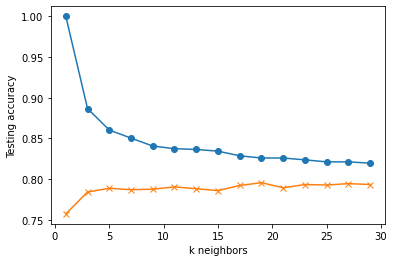

In [7]:
# k is the number of closest neighbors 1,3,5,7
train_scores=[]
test_scores=[]

n = 30

for k in range (1,n,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/TestScore: {train_score: .3f}/{test_score: .3f}")
    
plt.plot(range(1,n,2), train_scores, marker = 'o')
plt.plot(range(1,n,2), test_scores, marker = 'x')
plt.xlabel('k neighbors')
plt.ylabel('Testing accuracy')
plt.show




# print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

In [9]:
# Note that k: 19 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.796


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
# Create the GridSearchCV model   
from sklearn.model_selection import GridSearchCV  # algorythm based on light look for best possible accuracy


param_grid = {"n_neighbors": [10,20, 25, 30],    # adjustments, Note that regularization is applied by default.
             'weights': ['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[5, 10, 20]}
        
grid = GridSearchCV(knn, param_grid, verbose = 2)

In [20]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)  # replaced grid with model2

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform ....
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=distance ...
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=distance ...
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=10, weights=distance ...
[CV]  algorithm=auto, leaf_size=5, n_neighbors=10, weights=distance, total=   0.

[CV]  algorithm=auto, leaf_size=10, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=20, weights=distance ..
[CV]  algorithm=auto, leaf_size=10, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=20, weights=distance ..
[CV]  algorithm=auto, leaf_size=10, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform ...
[CV]  algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform ...
[CV]  algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform ...
[CV]  algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform ...
[CV]  algorithm=auto, leaf_size=10, n_neighbors=25, weights=uniform, tota

[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=30, weights=uniform ...
[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance ..
[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance ..
[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance ..
[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance ..
[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance ..
[CV]  algorithm=auto, leaf_size=20, n_neighbors=30, weights=distance, to

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=20, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=20, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=20, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=20, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=20, weights=uniform 
[CV]  algorithm=ball_tree, 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=25, weights=distance 
[CV]  algorithm=ball_tree, leaf_

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform .
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=30, weights=

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=uniform, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbor

[CV]  algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance ..
[CV]  algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance ..
[CV]  algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance ..
[CV]  algorithm=brute, leaf_size=5, n_neighbors=20, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=25, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=25, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=25, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=25, weights=uniform ...
[CV]  algorithm=brute, leaf_size=5, n_neighbors=25, weights=uniform, tot

[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform ..
[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform ..
[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform ..
[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform ..
[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=uniform, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=30, weights=distance .
[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=distance, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=30, weights=distance .
[CV]  algorithm=brute, leaf_size=10, n_neighbors=30, weights=distance

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   45.2s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 20],
                         'n_neighbors': [10, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [21]:
print(grid.best_params_)

#List the best score
print(f'Best Score: {grid.best_score_}')

#Make predictions with the hpyertuned model
predictions = grid.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(label_encoder.classes_)
print(classification_report(y_test, predictions)) #, target_names=['']))

# with errors
# {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 20, 'weights': 'distance'}
# Best Score: 0.8104115879172458
# best
# {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 20, 'weights': 'distance'}
# Best Score: 0.8104115879172458


{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 20, 'weights': 'distance'}
Best Score: 0.8104115879172458
['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']
                precision    recall  f1-score   support

     CANDIDATE       0.57      0.62      0.59       411
     CONFIRMED       0.66      0.62      0.64       484
FALSE POSITIVE       0.98      0.97      0.97       853

      accuracy                           0.79      1748
     macro avg       0.74      0.74      0.74      1748
  weighted avg       0.79      0.79      0.79      1748



# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_planets.sav'
joblib.dump(knn, filename)
